In [1]:
import os.path as osp
import pandas as pd
import numpy as np
import pickle 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib 
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import copy
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier,OneVsOneClassifier
from sklearn.svm import SVC
from bindpredict.featuregen import Featurizer, create_X_Y

In [2]:
df = pickle.load(open("data/smiles_l1_features.pkl",'rb'))

In [4]:
feature_keys = ['LogP', 'MolWt', 'PSA', 'NumHAcceptors', 'NumHDonors',
                'NumRotatableBonds', 'RingCount', 'ECPF4', 'MACCS']

X, Y = create_X_Y(df, feature_keys, 'L1_class_name')
X_train, X_test, y_train, y_test = train_test_split(X, Y, stratify=Y, test_size=0.1, random_state=42)

In [9]:
classes=sorted(set(Y))

In [5]:
clf = RandomForestClassifier(n_jobs=-1, class_weight="balanced")
ovrClassifier = OneVsRestClassifier(clf)
ovrClassifier.fit(X_train, y_train)

OneVsRestClassifier(estimator=RandomForestClassifier(class_weight='balanced',
                                                     n_jobs=-1))

In [6]:
with open('ovrClassifier.pkl','wb') as fp:
    pickle.dump(ovrClassifier,fp)

In [7]:
preds = ovrClassifier.predict(X_test)
print(classification_report(y_true=y_test,y_pred=preds))

                             precision    recall  f1-score   support

                   Adhesion       0.97      0.82      0.89       184
Auxiliary transport protein       0.93      0.77      0.84        88
                     Enzyme       0.75      0.94      0.83     70157
       Epigenetic regulator       0.56      0.34      0.42     10480
                Ion channel       0.95      0.83      0.89      6611
          Membrane receptor       0.93      0.88      0.91     23663
    Other cytosolic protein       0.71      0.43      0.54      3624
     Other membrane protein       0.61      0.27      0.38       831
      Other nuclear protein       0.94      0.81      0.87       400
           Secreted protein       0.87      0.61      0.71       638
         Structural protein       0.48      0.23      0.31      3779
            Surface antigen       0.92      0.75      0.83       205
       Transcription factor       0.71      0.50      0.58      8834
                Transporter      

Text(0.5, 1.0, 'Confusion Matrix for One vs Rest Classifier')

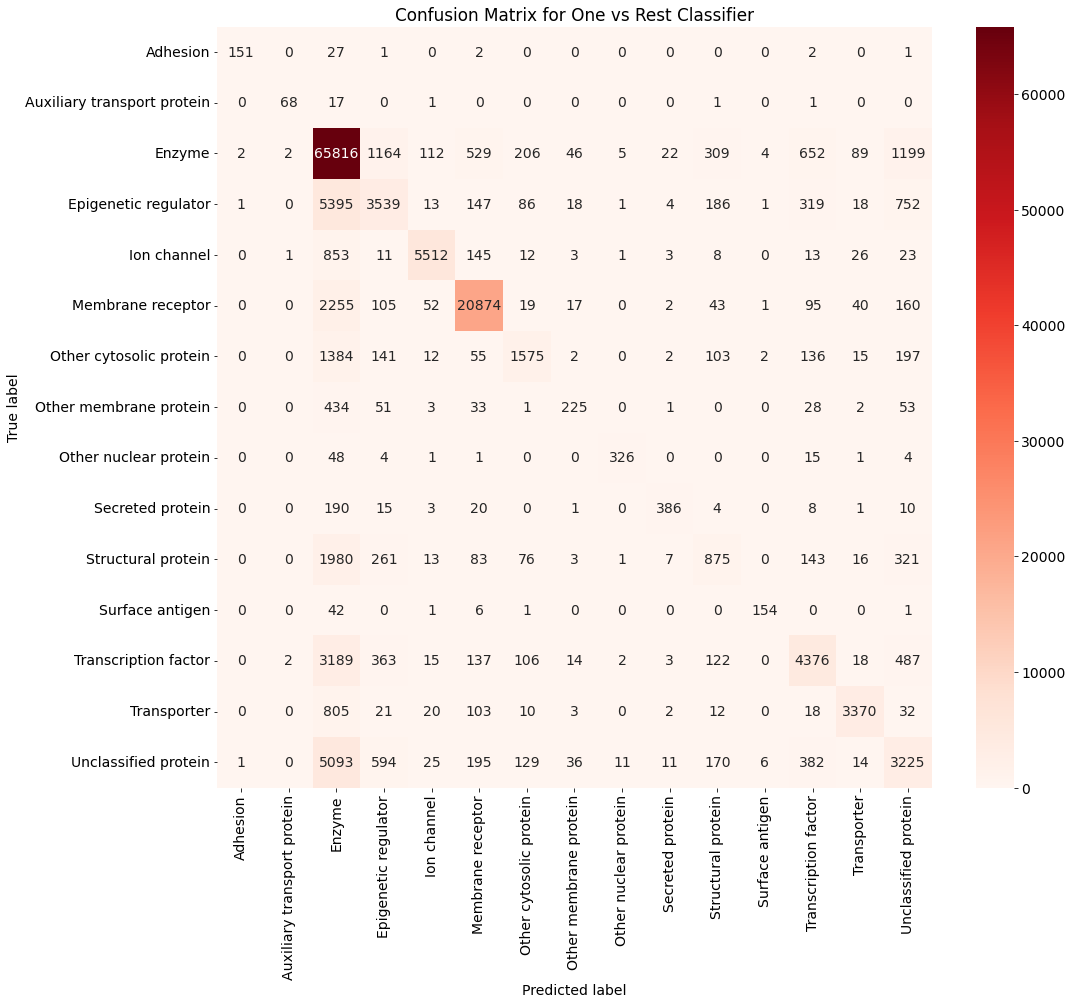

In [12]:
cm_dtree = confusion_matrix(y_true=y_test,y_pred=preds)
cm_dtree_df = pd.DataFrame(data=cm_dtree, columns=classes, index=classes)
plt.figure(figsize=(16,14))
matplotlib.rcParams.update({'font.size': 14})
sns.heatmap(cm_dtree_df, annot=True, fmt='d', cmap='Reds')
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title('Confusion Matrix for One vs Rest Classifier')

In [13]:
singleClassifier = RandomForestClassifier(random_state=0, class_weight="balanced")
singleClassifier.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', random_state=0)

In [14]:
with open('singleClassifier.pkl','wb') as fp:
    pickle.dump(singleClassifier,fp)

In [15]:
preds = singleClassifier.predict(X_test)

In [16]:
print(classification_report(y_true=y_test,y_pred=preds))

                             precision    recall  f1-score   support

                   Adhesion       0.97      0.84      0.90       184
Auxiliary transport protein       0.92      0.83      0.87        88
                     Enzyme       0.73      0.95      0.83     70157
       Epigenetic regulator       0.59      0.32      0.41     10480
                Ion channel       0.95      0.82      0.88      6611
          Membrane receptor       0.95      0.87      0.90     23663
    Other cytosolic protein       0.71      0.41      0.52      3624
     Other membrane protein       0.60      0.28      0.38       831
      Other nuclear protein       0.93      0.81      0.87       400
           Secreted protein       0.86      0.60      0.71       638
         Structural protein       0.47      0.21      0.29      3779
            Surface antigen       0.92      0.77      0.84       205
       Transcription factor       0.74      0.47      0.57      8834
                Transporter      

Text(0.5, 1.0, 'Confusion Matrix for Single Classifier')

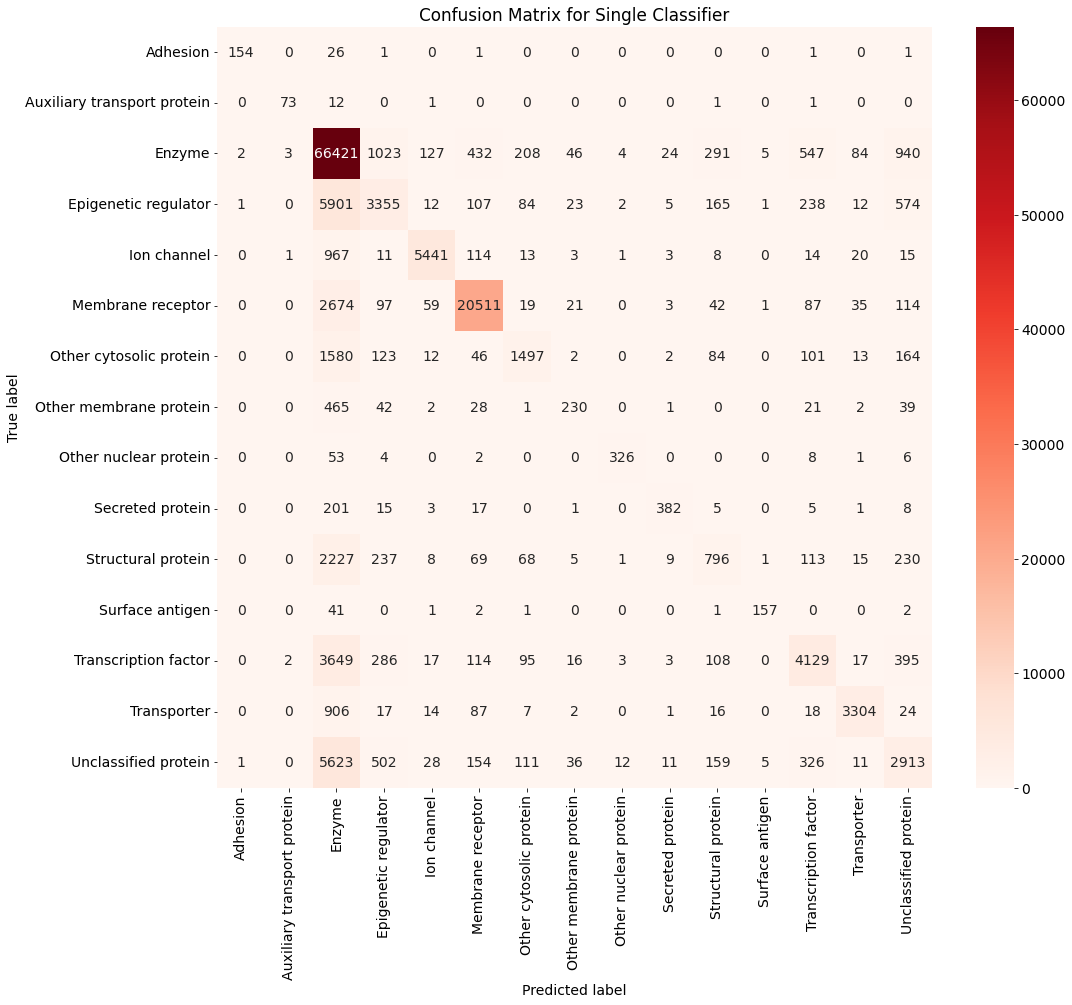

In [17]:
cm_dtree = confusion_matrix(y_true=y_test,y_pred=preds)
cm_dtree_df = pd.DataFrame(data=cm_dtree, columns=classes, index=classes)
plt.figure(figsize=(16,14))
matplotlib.rcParams.update({'font.size': 14})
sns.heatmap(cm_dtree_df, annot=True, fmt='d', cmap='Reds')
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title('Confusion Matrix for Single Classifier')